In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_file = "city_data.csv"
ride_data_file = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, how='left', on='city')

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


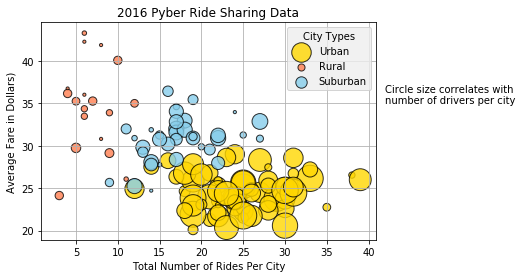

In [14]:
# Obtain the x and y coordinates for each of the three city types
city_urban = city_ride_df.loc[city_ride_df['type'] == "Urban"]
city_rural = city_ride_df.loc[city_ride_df['type'] == "Rural"]
city_suburban = city_ride_df.loc[city_ride_df['type'] == "Suburban"]

ride_urban = city_urban.groupby("city")["ride_id"].count()
ride_rural = city_rural.groupby("city")["ride_id"].count()
ride_suburban = city_suburban.groupby("city")["ride_id"].count()

avg_fare_urban = city_urban.groupby("city")["fare"].mean()
avg_fare_rural = city_rural.groupby("city")["fare"].mean()
avg_fare_suburban = city_suburban.groupby("city")["fare"].mean()

drivers_urban = city_urban.groupby("city")["driver_count"].mean()
drivers_rural = city_rural.groupby("city")["driver_count"].mean()
drivers_suburban = city_suburban.groupby("city")["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(ride_urban, avg_fare_urban, s = drivers_urban * 10, color = 'gold', edgecolor = 'black', label = 'Urban', alpha = .8)
plt.scatter(ride_rural, avg_fare_rural, s = drivers_rural * 10, color = 'coral', edgecolor = 'black', label = 'Rural', alpha = .8)
plt.scatter(ride_suburban, avg_fare_suburban, s = drivers_suburban * 10, color = 'skyblue', edgecolor = 'black', label = 'Suburban', alpha = .8)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare in Dollars)")
plt.title("2016 Pyber Ride Sharing Data")

plt.grid()

# Format legend
legend = plt.legend(title= "City Types", loc="best")
frame = legend.get_frame()
frame.set_facecolor('#eeeeee')

# Incorporate a text label regarding circle size
plt.text(42,35,"Circle size correlates with\nnumber of drivers per city", fontsize = 10)

# Save Figure
plt.savefig('pyber_2016_data_ek.png')

In [16]:
# Calculate Type Percents
sum_urban = city_urban["fare"].sum()
sum_rural = city_rural["fare"].sum()
sum_suburban = city_suburban["fare"].sum()


([<matplotlib.patches.Wedge at 0x118cbc320>,
 [Text(1.4475542495628413, 1.9143110234683811, 'Urban'),
  Text(-1.707244593472797, -1.465542868038293, 'Suburban'),
  Text(0.676403859911998, -2.114445037899106, 'Rural')],
 [Text(0.844406645578324, 1.1166814303565555, '62.7%'),
  Text(-0.9484692185959982, -0.8141904822434959, '30.5%'),
  Text(0.3717174365282151, -1.1619923181247338, '6.8%')])

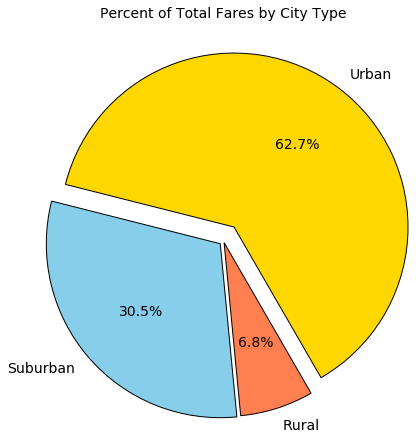

In [29]:
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
plt.title("Percent of Total Fares by City Type", fontsize=14,y=1.5)
colors = ["gold", "skyblue", "coral"]
explode = (0.2, .05, .02)

sizes = [sum_urban, sum_suburban, sum_rural]

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode,radius=2, labels=labels, colors=colors, autopct="%1.1f%%", startangle=300,  textprops={'fontsize': 14}, wedgeprops = {'linewidth': 1, 'edgecolor':'black'})


In [30]:
# Save Figure
plt.savefig('percent_total_fares.png', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

In [31]:
# Calculate Ride Percents
ride_count_urban = city_urban["ride_id"].count()
ride_count_rural = city_rural["ride_id"].count()
ride_count_suburban = city_suburban["ride_id"].count()


([<matplotlib.patches.Wedge at 0x11878cba8>,
 [Text(2.0091994960820427, 1.3126756587000714, 'Urban'),
  Text(-2.0604898869913804, -0.903814928846747, 'Suburban'),
  Text(-0.36704563012565516, -2.1995857576838556, 'Rural')],
 [Text(1.1720330393811915, 0.7657274675750415, '68.4%'),
  Text(-1.1447166038841, -0.5021194049148594, '26.3%'),
  Text(-0.20245117715450933, -1.213224431368225, '5.3%')])

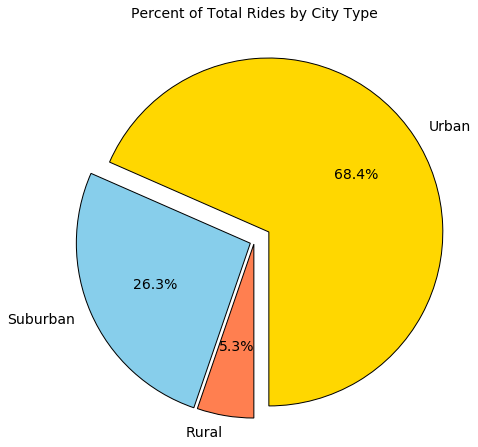

In [32]:
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
plt.title("Percent of Total Rides by City Type", fontsize=14,y=1.5)
colors = ["gold", "skyblue", "coral"]
explode = (0.2, .05, .03)

sizes = [ride_count_urban, ride_count_suburban, ride_count_rural]

plt.pie(sizes, explode=explode,radius=2, labels=labels, colors=colors, autopct="%1.1f%%", startangle=270,  textprops={'fontsize': 14}, wedgeprops = {'linewidth': 1, 'edgecolor':'black'})


In [33]:
# Save Figure
plt.savefig('percent_total_rides.png', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

In [34]:
# Calculate Driver Percents
driver_count_urban = city_urban.groupby("city")["driver_count"].mean().sum()
driver_count_rural = city_rural.groupby("city")["driver_count"].mean().sum()
driver_count_suburban = city_suburban.groupby("city")["driver_count"].mean().sum()


([<matplotlib.patches.Wedge at 0x118648240>,
 [Text(1.3555579853572974, 1.9805207770518503, 'Urban'),
  Text(-1.4130779781677754, -1.7380479359376926, 'Suburban'),
  Text(-0.18359562268291799, -2.222429447098754, 'Rural')],
 [Text(0.7907421581250902, 1.1553037866135791, '80.9%'),
  Text(-0.7822395950571612, -0.9621336788226511, '16.5%'),
  Text(-0.10126574704035385, -1.2258243138706129, '2.6%')])

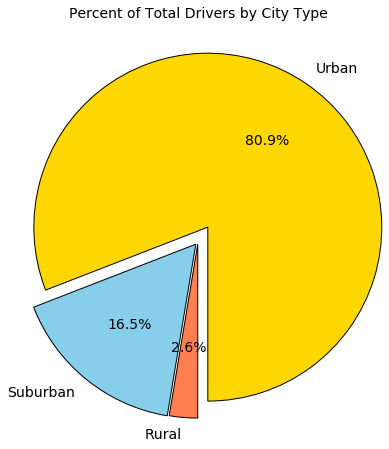

In [35]:
# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
plt.title("Percent of Total Drivers by City Type", fontsize=14,y=1.5)
colors = ["gold", "skyblue", "coral"]
explode = (0.2, .04, .03)

sizes = [driver_count_urban, driver_count_suburban, driver_count_rural]

plt.pie(sizes, explode=explode,radius=2, labels=labels, colors=colors, autopct="%1.1f%%", startangle=270,  textprops={'fontsize': 14}, wedgeprops = {'linewidth': 1, 'edgecolor':'black'})


In [36]:
# Save Figure
plt.savefig('percent_drivers.png', bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

Trends
It is more expensive to use Pyber in rural areas than in urban areas, likely because there are fewer rides being ordered.
Lower costs in urban areas could be due to a higher number of drivers and/or higher number of rides ordered (ultimately, a question of supply and demand)
There are some seeming extreme values in terms of cost and number of drivers for the rural rides.  They are likely having to travel further distances than urban or suburban counterparts.